In [1]:
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import numpy as np
import torch

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}\usepackage{amssymb}"

In [2]:
data = torch.load(f"data/penicillin_data.pt")

Y = data["Y"].detach().numpy()
n = len(Y)
t = np.linspace(1, n, n)

best_Y = data["best"]
other_Y = data["other"]

ref_points = data["ref_points"]
line = data["line"]

# Plot objective space

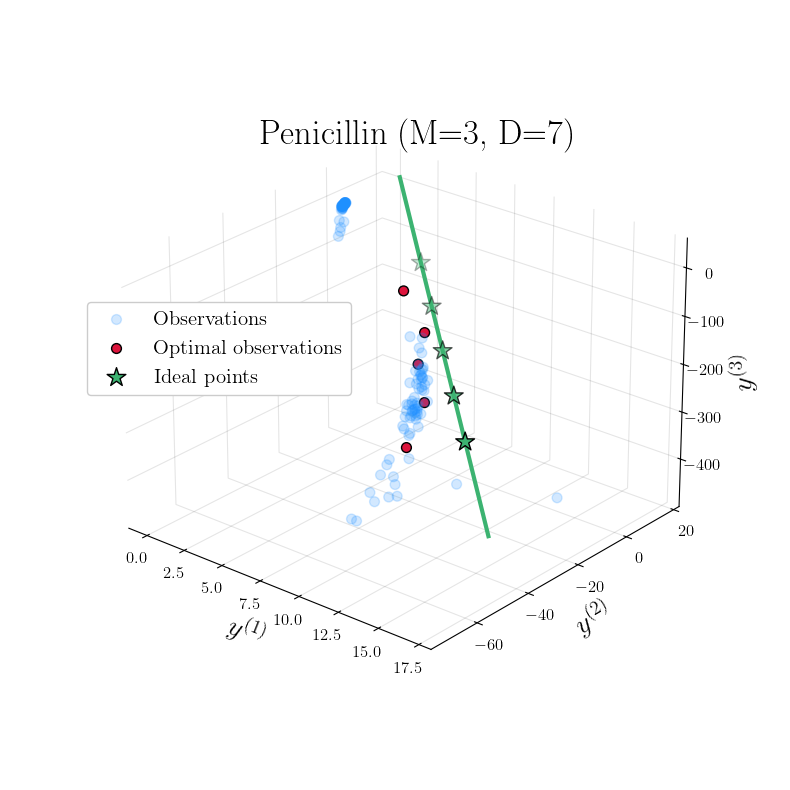

In [3]:
plt.rcParams["grid.color"] = (0.0, 0.0, 0.0, 0.1)
plt.rcParams["axes.labelpad"] = 10

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))

ax.scatter(
    other_Y[:, 0],
    other_Y[:, 1],
    other_Y[:, 2],
    alpha=0.2,
    s=50,
    color="dodgerblue",
    label="Observations",
)

ax.scatter(
    best_Y[:, 0],
    best_Y[:, 1],
    best_Y[:, 2],
    alpha=1,
    s=50,
    color="crimson",
    edgecolors="black",
    label="Optimal observations",
)

ax.scatter(
    ref_points[:, 0],
    ref_points[:, 1],
    ref_points[:, 2],
    s=200,
    zorder=10,
    color="mediumseagreen",
    marker="*",
    linestyle="None",
    edgecolor="k",
    label="Ideal points",
)
ax.plot3D(line[:, 0], line[:, 1], line[:, 2], linewidth=3, color="mediumseagreen")

ax.set_xlabel(r"$y^{(1)}$", fontsize=20)
ax.set_ylabel(r"$y^{(2)}$", fontsize=20)
ax.set_zlabel(r"$y^{(3)}$", fontsize=20)
ax.tick_params(axis="both", which="major", labelsize=12)
ax.view_init(25, 310)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.pane.set_edgecolor("w")
ax.yaxis.pane.set_edgecolor("w")
ax.zaxis.pane.set_edgecolor("w")

ax.set_box_aspect(aspect=None, zoom=0.8)

legend = plt.legend(loc=(0.1, 0.5), fontsize=15)
legend.get_frame().set_alpha(None)

ax.text2D(0.325, 0.825, "Penicillin (M=3, D=7)", transform=ax.transAxes, fontsize=25)
plt.show()

# Plot contribution values

In [4]:
all_vals = [data["maximal"]]
colors = ["crimson"]
titles = [r"Maximal values: $\varphi^{\textrm{Maximal}}_U(\mathbf{y}_n; Y)$"]

for i in range(5):
    all_vals += [data["shapley"][str(i + 1)]]
    titles += [
        rf"Shapley values: $\varphi^{{\textrm{{Shapley}}}}_{{S_{{\boldsymbol{{\theta}}_{i+1}}}}}(\mathbf{{y}}_n; Y)$"
    ]
    colors += ["dodgerblue"]

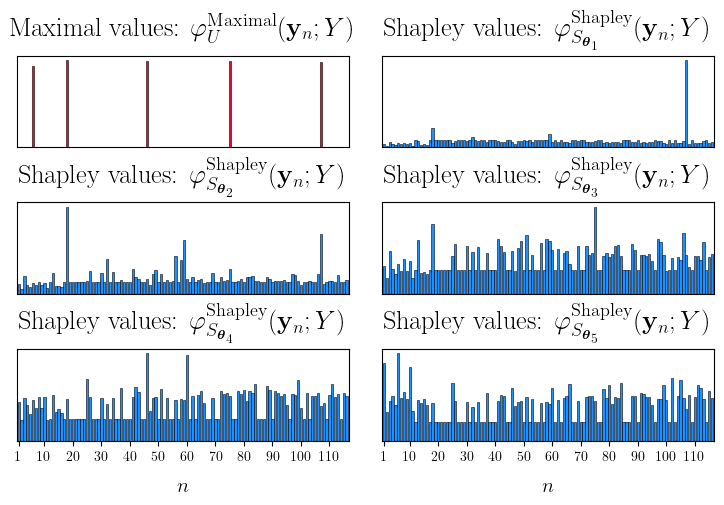

In [5]:
fig, axes = plt.subplots(3, 2, figsize=(9, 5))
plt.subplots_adjust(
    left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.6
)
for i in range(6):
    plt.subplot(3, 2, i + 1)
    plt.bar(t, all_vals[i], color=colors[i], edgecolor="k", linewidth=0.4)
    plt.xlim(0.25, n + 0.75)
    if i > 3:
        plt.xlabel(r"$n$", fontsize=15)
        plt.xticks([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], fontsize=10)
    else:
        plt.xticks([])
    plt.yticks([])
    plt.title(titles[i], fontsize=19, pad=15)
plt.show()